<a href="https://colab.research.google.com/github/dendivarsha/OIBSIP/blob/main/EMAIL_SPAM_DETECTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Advertising[1].csv to Advertising[1].csv


In [ ]:
data_frame = pd.read_csv('/content/Advertising[1].csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sea

In [ ]:
dataset  = pd.read_csv('/content/Advertising[1].csv')

In [ ]:
dataset.index.name = "S.no" #giving name to the index 0
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
S.no,,,,,
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8


In [ ]:
dataset.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
S.no,,,,,
120,121,141.3,26.8,46.2,15.5
46,47,89.7,9.9,35.7,10.6
174,175,222.4,3.4,13.1,11.5
192,193,17.2,4.1,31.6,5.9
105,106,137.9,46.4,59.0,19.2
63,64,102.7,29.6,8.4,14.0
99,100,135.2,41.7,45.9,17.2
197,198,177.0,9.3,6.4,12.8
84,85,213.5,43.0,33.8,21.7


In [ ]:
dataset.shape

(200, 5)

In [ ]:
print("Names of columns in advertising sales prediction dataset are: \n\n",dataset.columns)

Names of columns in advertising sales prediction dataset are: 

 Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
dataset.size

1000

In [ ]:
dc=dataset.corr()

In [ ]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


[Text(0.5, 1.0, 'Heatmap of Correlated values')]

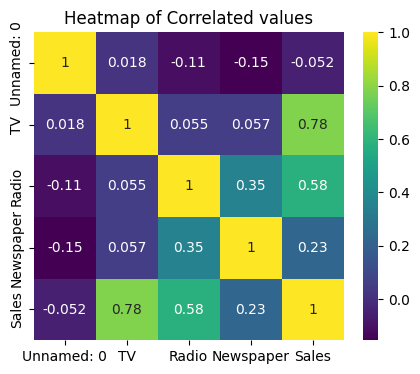

In [ ]:
fig, ax = plt.subplots(figsize = (5, 4))

sea.heatmap(dc, annot=True, cmap="viridis").set(title='Heatmap of Correlated values')

In [ ]:
dataset.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
dataset.duplicated().value_counts()

False    200
dtype: int64

In [ ]:

dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

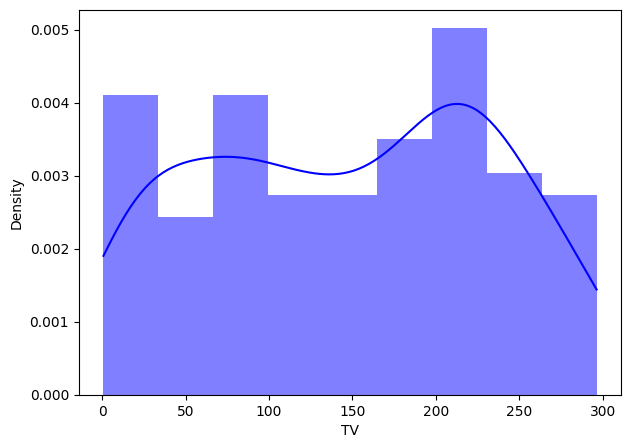

In [ ]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['TV'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

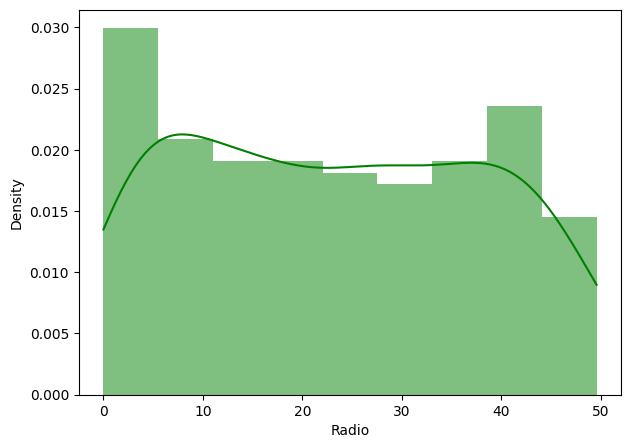

In [ ]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Radio'], color="green", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

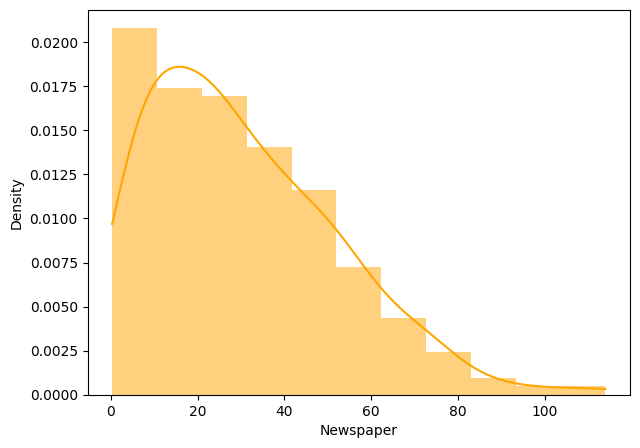

In [ ]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Newspaper'], color="orange", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

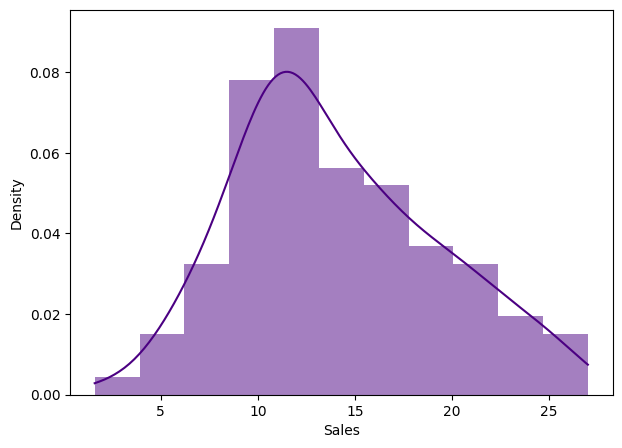

In [ ]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Sales'], color="indigo", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

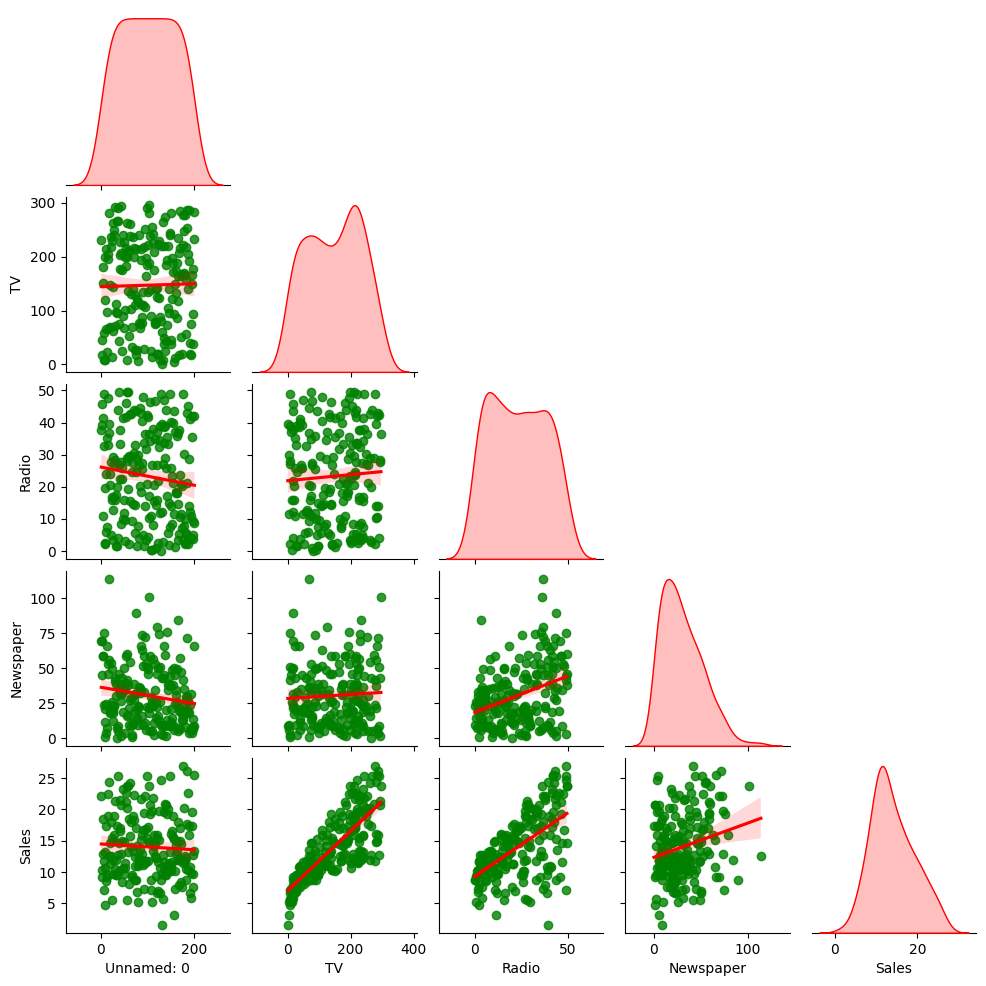

In [ ]:
sea.pairplot(dataset,corner=True,diag_kind='kde',kind='reg',height=2,plot_kws={'color':'green','line_kws':{'color':'red'}},diag_kws={'color':'red'});


DATA MODELLING
Make x as array having values of all dataset columns except the 'Sales' column

In [ ]:
x =np.array(dataset.drop(labels=['Sales'], axis=1))

Make y as array having values of 'Sales' column

In [ ]:

y =np.array(dataset['Sales'])

Splitting Datasets With the Sklearn train_test_split Function : training and testing
The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The training subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state = 45)
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)

Shape of x_train (160, 4)
Shape of y_train (160,)


Multiple Linear Regression With scikit-learn

In [ ]:
reg= LinearRegression()

Statisticians say that a regression model fits the data well if the differences between the observations and the predicted values are small and unbiased. Unbiased in this context means that the fitted values are not systematically too high or too low anywhere in the observation space

In [ ]:
#Use training set to fit the model
reg.fit(x_train, y_train)

LinearRegression()

If no errors are thrown - the regressor found the best fitting line! , With linear regression, fitting the model means determining the best intercept (model.intercept_) and slope (model.coef_) values of the regression line.

In [ ]:
#COEFFICIENT
coefficient = reg.coef_
coefficient

array([-0.00202696,  0.04712224,  0.18277083, -0.00554797])

In [ ]:
#INTERCEPT
intercept = reg.intercept_
intercept

3.2093049125748365

Test the model
Making Predictions

In [ ]:
pred = reg.predict(x_test)
compare= pd.DataFrame({"Actual_sales":list(y_test),"predicted_sales":list(pred)})
compare.head(15)

,Actual_sales,predicted_sales
0,14.9,15.304751
1,8.8,10.248574
2,16.6,16.568926
3,23.8,21.879357
4,12.0,16.076553
5,9.7,9.124459
6,19.0,18.016036
7,11.8,11.401521
8,18.5,17.564095
9,8.5,8.757843


PREDICTED SALES GRAPH

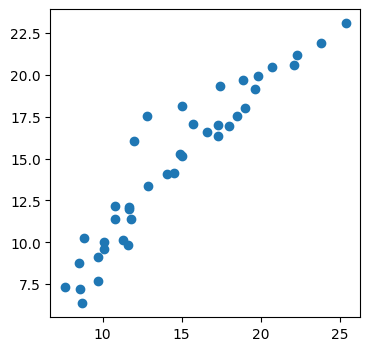

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, pred)

Evaluating the Model
Mean Absolute Error (MAE)

In [ ]:
mae = mean_absolute_error(y_test, pred)
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 1.10


Mean Squared Error (MSE)

In [ ]:
mse = mean_squared_error(y_test, pred)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 2.34


Root Mean Squared Error (RMSE)

In [ ]:
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 1.53
